In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
np.random.seed(0)

In [2]:
digits = datasets.load_digits()

In [3]:
inputs = digits.images
labels = digits.target
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs,-1)

In [4]:
train_size = .8
test_size = 1 - train_size
X_train,X_test,Y_train,Y_test = train_test_split(inputs,labels,train_size=train_size,test_size=test_size)

eu preciso usar onehot encoder no $y$. Eu queria usar o sklearn, mas acho que não vou poder pra esse caso

In [5]:
#one hot in numpy

def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs,n_categories))
    onehot_vector[range(n_inputs),integer_vector] = 1

    return onehot_vector

In [6]:
Y_train_onehot,Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)

In [7]:
#usando sklearn

enc = OneHotEncoder()
Y_train_enc, Y_test_enc = enc.fit_transform(Y_train.reshape((-1,1))),enc.fit_transform(Y_test.reshape((-1,1)))

In [8]:
enc.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [16]:
from sklearn.neural_network import MLPClassifier

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
n_hidden_neurons = 5
epochs = 100

In [17]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':lmbd_vals,'learning_rate_init':eta_vals}

dnn = MLPClassifier(activation='logistic',max_iter=epochs,hidden_layer_sizes=n_hidden_neurons)
grid_search = GridSearchCV(dnn,params,scoring='accuracy',return_train_score=True)
grid_search.fit(X_train,Y_train)

/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mickael/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mickael/anaconda3/lib/pyth

GridSearchCV(estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=5, max_iter=100),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'learning_rate_init': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             return_train_score=True, scoring='accuracy')

In [18]:
best_model = grid_search.best_estimator_
best_model

MLPClassifier(activation='logistic', alpha=1.0, hidden_layer_sizes=5,
              learning_rate_init=0.01, max_iter=100)

In [19]:
predictions = best_model.predict(X_test)

print(f'label da imagem real: {Y_test[0]}')
print(f'O que o modelo acha que é: {predictions[0]}')
print(f'precisão do modelo: {accuracy_score(Y_test,predictions)}')

label da imagem real: 2
O que o modelo acha que é: 2
precisão do modelo: 0.8805555555555555


In [20]:
y_train_5 = (Y_train == 5)
y_train_5_pred = (best_model.predict(X_train) == 5)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_5 = confusion_matrix(y_train_5,y_train_5_pred)

<Axes: >

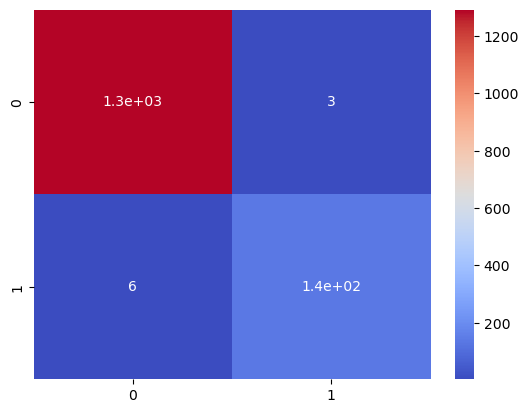

In [26]:
import seaborn as sns

sns.heatmap(confusion_5,cmap='coolwarm',annot=True)

In [27]:
confusion_5

array([[1292,    3],
       [   6,  136]])

# Como ler a matriz de confusão

cada linha numa matriz de confusão representa uma __classe real__, ao passo que cada coluna representa uma __classe prevista__. A primeira linha desta matriz considera imagens que não são 5. 1292 são realmente não 5. Já 3 foram considerados 5, mas não são cinco. Já na segunda linha, 6 foram considerados erroneamente como 5 e 136 são realmente 5.

In [28]:
confusion = confusion_matrix(Y_train,best_model.predict(X_train))
confusion

array([[146,   0,   0,   0,   1,   1,   2,   0,   0,   1],
       [  0, 140,   1,   0,   5,   0,   1,   0,   0,   0],
       [  0,   2, 135,   4,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2, 152,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0, 145,   0,   0,   0,   0,   2],
       [  1,   0,   0,   1,   0, 136,   0,   2,   0,   2],
       [  1,   1,   0,   0,   2,   0, 133,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0, 134,   0,   4],
       [  0,   4,   1,   3,   1,   1,   0,   0, 117,   8],
       [  1,   0,   0,   3,   3,   0,   0,   2,   3, 127]])

<Axes: >

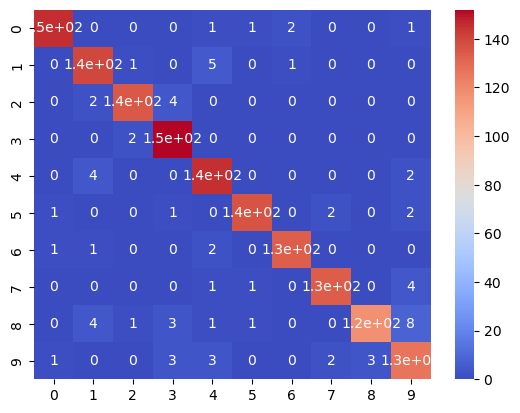

In [30]:
sns.heatmap(confusion,cmap='coolwarm',annot=True) # geral